# NLP with Disaster Tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# optional seaborn styling
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (20, 50)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((7613, 5), (3263, 4))

`id` - a unique identifier for each tweet
<br>`text` - the text of the tweet
<br>`location` - the location the tweet was sent from (may be blank)
<br>`keyword` - a particular keyword from the tweet (may be blank)
<br>`target` - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 1. Exploratory Data Analysis

- number of characters
- number of hashtags
- keyword distribution
- location distribution
- number of urls
- average word lengths


### 1.1 Keyword Distribution

In [4]:
# Missing keywords in train and test set
num_missing_k_train = train.shape[0] - train['keyword'].count()
num_missing_k_test = test.shape[0] - test['keyword'].count()
num_missing_k_train, num_missing_k_test

(61, 26)

In [5]:
all_keyword = train[['keyword', 'target', 'id']].groupby(['keyword', 'target']).count()
all_keyword = all_keyword.unstack(level=-1).fillna(value=0)
all_keyword.columns = ['fake', 'real']
all_keyword.head()

,fake,real
keyword,,
ablaze,23.0,13.0
accident,11.0,24.0
aftershock,34.0,0.0
airplane%20accident,5.0,30.0
ambulance,18.0,20.0


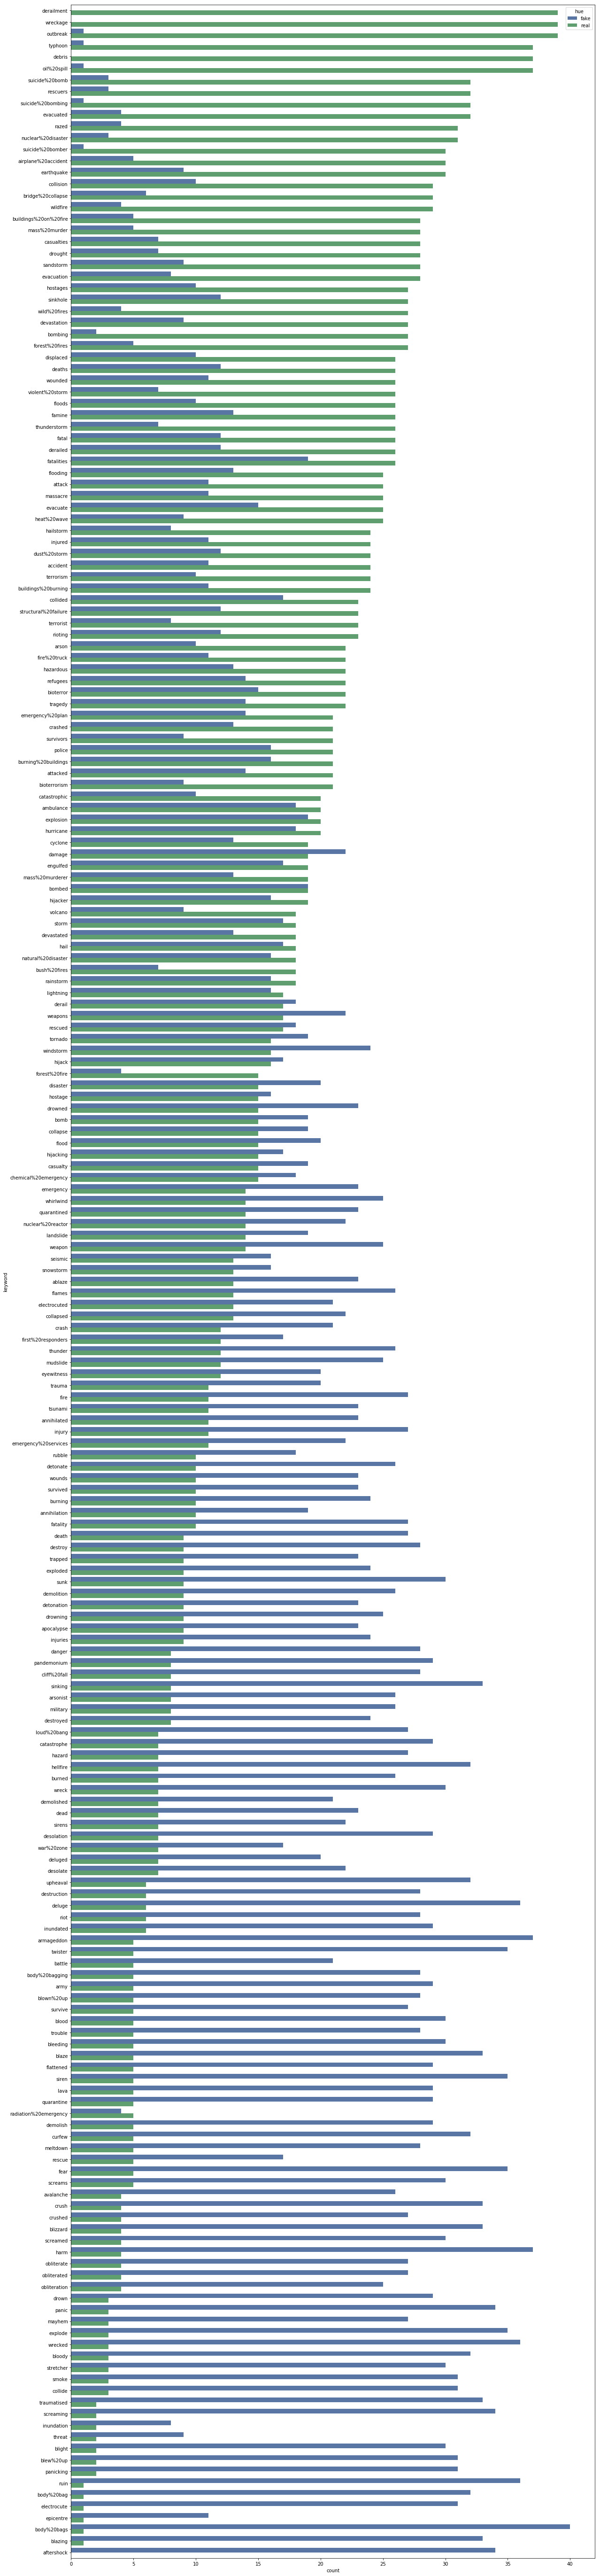

In [6]:
plt.rcParams['figure.figsize'] = (20, 100)

all_keyword = all_keyword.sort_values('real', ascending=False)
order_by_real = all_keyword.index
fake_df=all_keyword[['fake']].rename(columns={'fake': 'count'})
real_df=all_keyword[['real']].rename(columns={'real': 'count'})
fake_df['hue']='fake'
real_df['hue']='real'
res=pd.concat([fake_df,real_df])
sns.barplot(x='count',y=res.index,data=res,hue='hue', order=order_by_real);

### 1.2 Location Distribution

Since `location` has many invalid inputs, we only compare those has been mentioned for at least 6 times in total.

In [7]:
# number of missing locations
num_missing_l_train = train.shape[0] - train['location'].count()
num_missing_l_test = test.shape[0] - test['location'].count()
num_missing_l_train, num_missing_l_test

(2533, 1105)

In [22]:
locations = train[['location', 'target', 'id']].groupby(['location', 'target']).count()
locations = locations.unstack(level=-1).fillna(value=0)
locations.columns = ['fake', 'real']
locations['total'] = locations['fake'] + locations['real']
locations = locations[locations['total'] > 5]
locations.head()

,fake,real,total
location,,,
Road to the Billionaires Club,5.0,1.0,6.0
304,9.0,0.0,9.0
??????,3.0,3.0,6.0
Atlanta,4.0,2.0,6.0
"Atlanta, GA",5.0,5.0,10.0


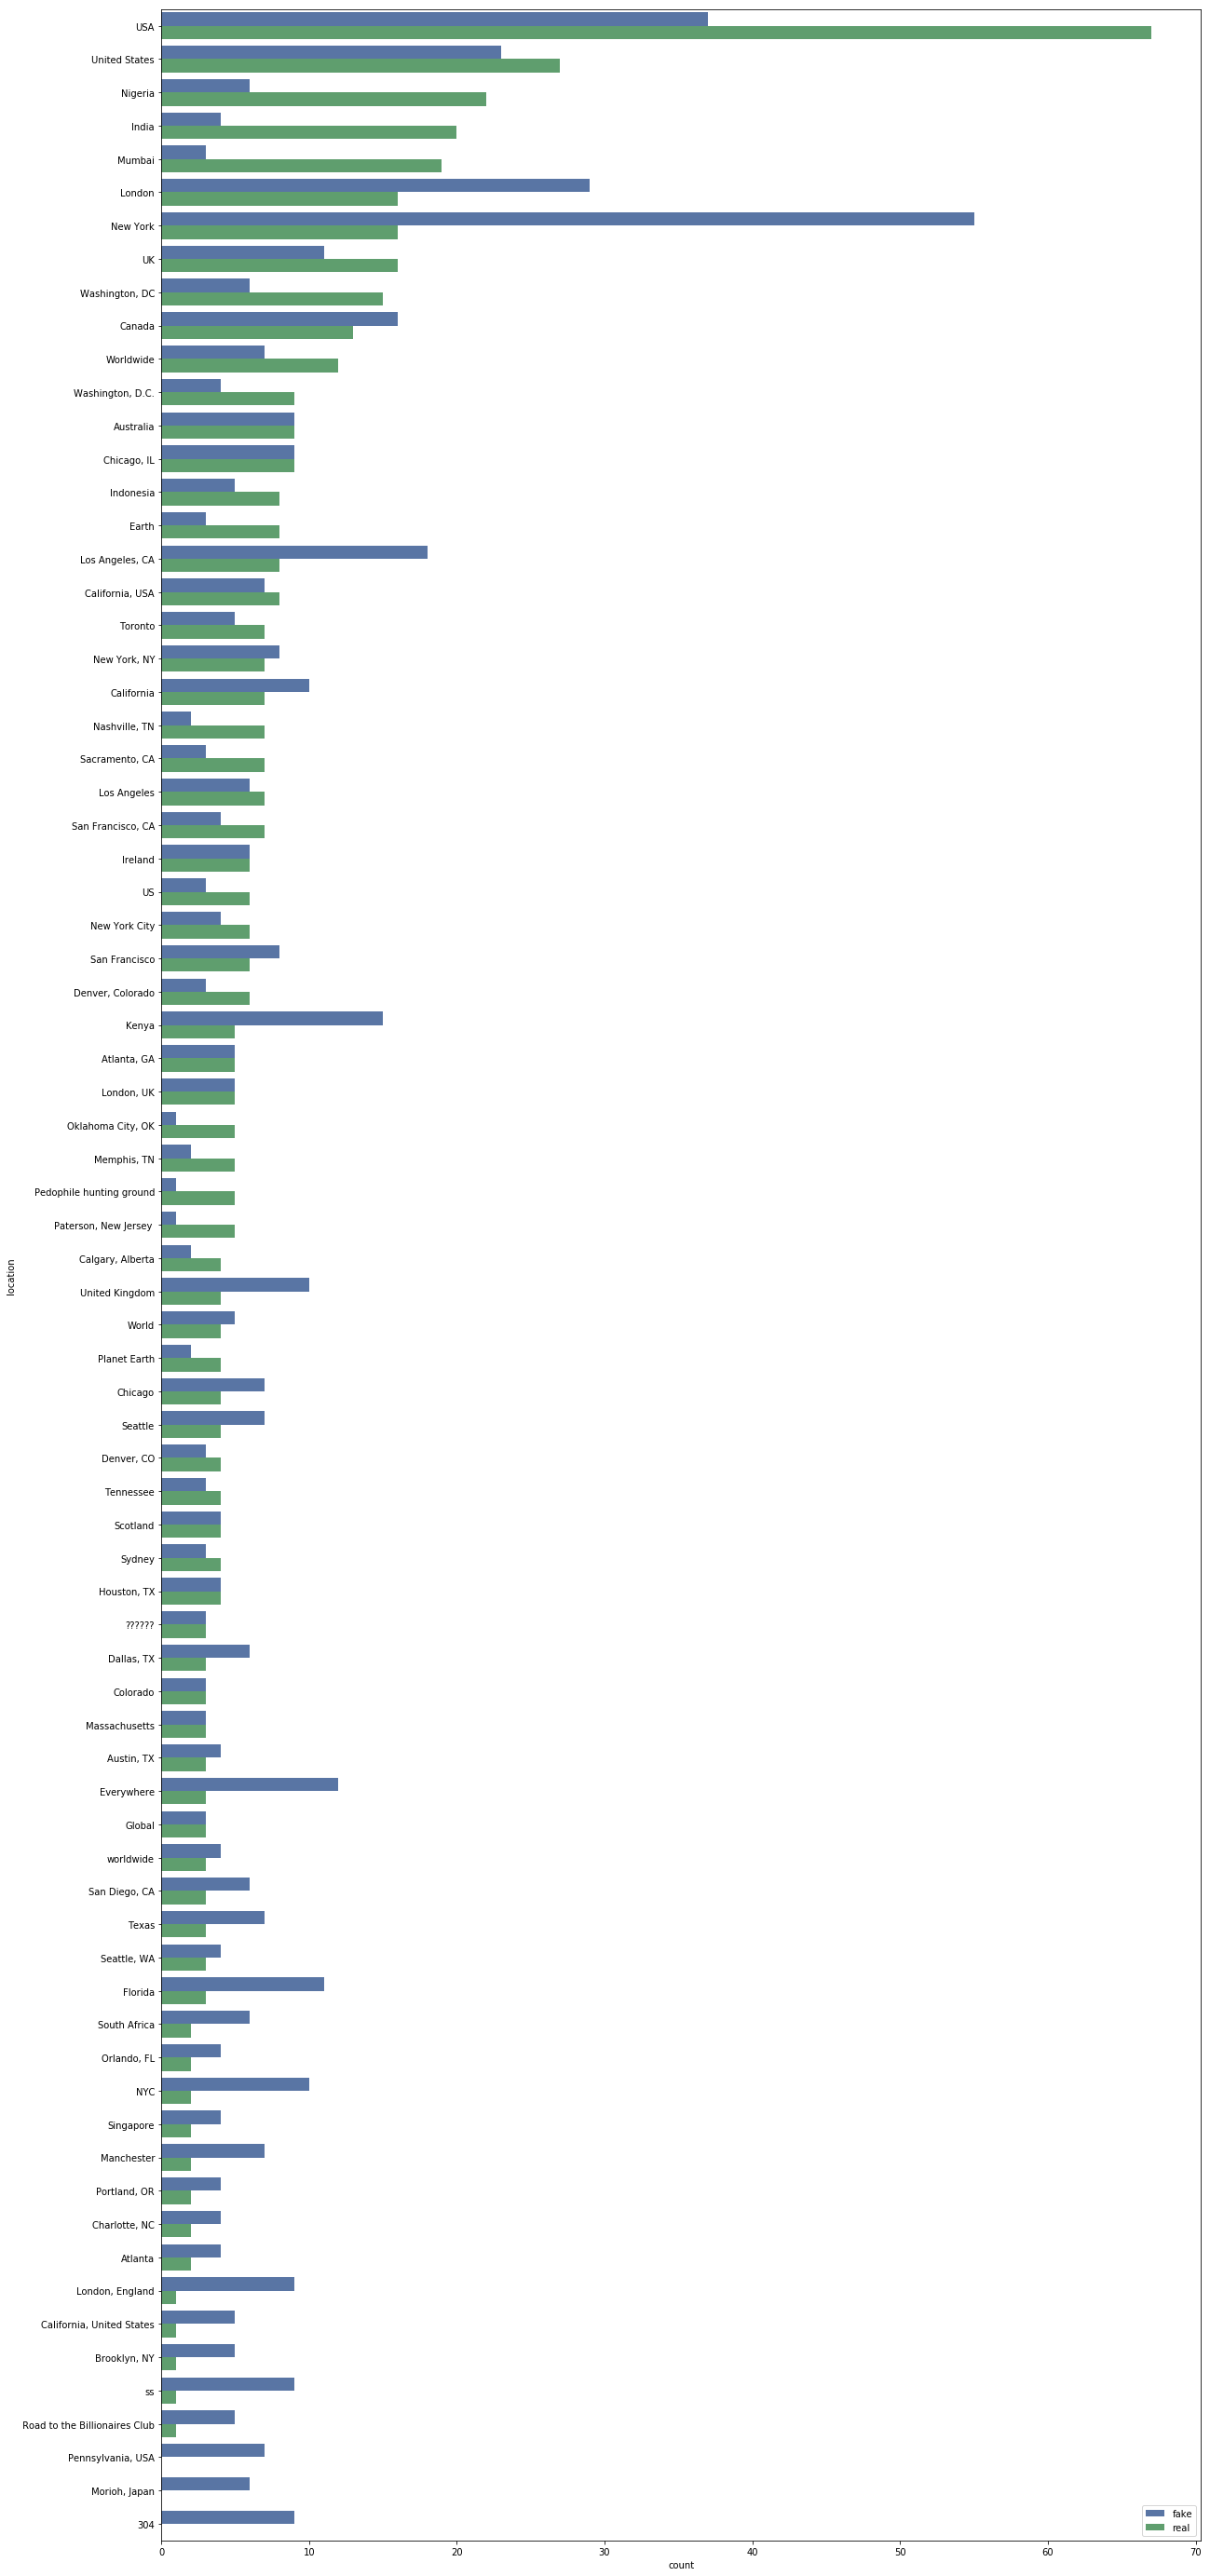

In [24]:
plt.rcParams['figure.figsize'] = (20, 50)


locations = locations.sort_values('real', ascending=False)
order_by_real = locations.index
fake_df = locations[['fake']].rename(columns={'fake': 'count'})
real_df = locations[['real']].rename(columns={'real': 'count'})
fake_df['hue'] = 'fake'
real_df['hue'] = 'real'
res = pd.concat([fake_df,real_df])
sns.barplot(x='count', y=res.index, data=res, hue='hue', order=order_by_real)
plt.legend();

### Number of Characters

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


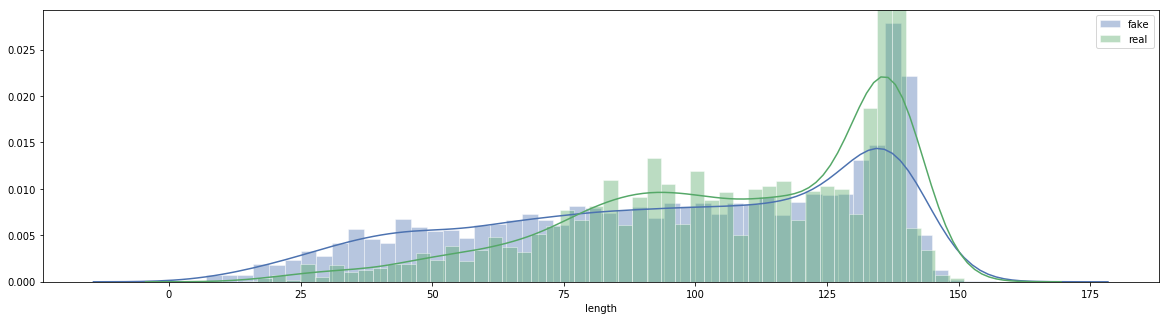

In [42]:
def text_length(text):
    return len(text)

train['length'] = train['text'].apply(text_length)

plt.rcParams['figure.figsize'] = (20, 5)
sns.distplot(train[train['target']==0]['length'], bins=50, hist_kws=dict(ec='w'), label='fake');
sns.distplot(train[train['target']==1]['length'], bins=50, hist_kws=dict(ec='w'), label='real');
plt.legend()